In [1]:
import pandas as pd

# Membaca dataset
dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Kaggle/Adeli_Panakkat_Reyes/usgs_japan_1968_2018.csv"

# Membaca data gempa bumi
data = pd.read_csv(dataset)

# Menentukan rentang waktu dan jarak
time_window = 7 * 24 * 3600  # Misalnya, rentang waktu 7 hari dalam detik
distance_window = 1.0  # Misalnya, rentang jarak 1 derajat

# Menentukan indeks gempa utama
mainshock_index = 0  # Misalnya, menggunakan gempa pada indeks 0 sebagai gempa utama

# Mengambil data gempa utama
mainshock = data.iloc[mainshock_index]

# Mengidentifikasi aftershock berdasarkan kriteria waktu dan jarak dari gempa utama
aftershocks = []
for i, event in data.iterrows():
    if i != mainshock_index:
        delta_time = pd.to_datetime(event['time']) - pd.to_datetime(mainshock['time'])
        delta_distance = ((event['latitude'] - mainshock['latitude'])**2 +
                          (event['longitude'] - mainshock['longitude'])**2)**0.5
        if delta_time.total_seconds() <= time_window and delta_distance <= distance_window:
            aftershocks.append(event)

# Menampilkan jumlah aftershock yang teridentifikasi
print(f"Jumlah aftershock yang teridentifikasi: {len(aftershocks)}")


Jumlah aftershock yang teridentifikasi: 0


In [2]:
import pandas as pd

# Membaca dataset
dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Kaggle/Adeli_Panakkat_Reyes/usgs_japan_1968_2018.csv"

# Membaca data gempa bumi
data = pd.read_csv(dataset)

# Menambahkan kolom 'Depth Category' untuk mengelompokkan kedalaman
data['Depth Category'] = pd.cut(data['depth'], bins=[0, 60, 300, float('inf')], labels=['Shallow', 'Intermediate', 'Deep'])

# Menghitung jumlah data di setiap kategori kedalaman
depth_counts = data['Depth Category'].value_counts().reset_index()
depth_counts.columns = ['Depth Category', 'Jumlah Data']

# Menampilkan tabel
print(depth_counts)


  Depth Category  Jumlah Data
0        Shallow         6895
1   Intermediate         2176
2           Deep          143


In [4]:
import pandas as pd

# Membaca dataset
dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Kaggle/Adeli_Panakkat_Reyes/usgs_japan_1968_2018.csv"

# Membaca data gempa bumi
data = pd.read_csv(dataset)

# Menambahkan kolom 'Magnitude Category' untuk mengelompokkan magnitudo
data['Magnitude Category'] = pd.cut(data['mag'], bins=[2, 4, 6, 8, float('inf')], labels=['2 < M <= 4', '4 < M <= 6', '6 < M <= 8', 'M > 8'])

# Menghitung jumlah data di setiap kategori magnitudo
mag_counts = data['Magnitude Category'].value_counts().reset_index()
mag_counts.columns = ['Magnitude Category', 'Jumlah Data']

# Mengurutkan tabel berdasarkan kategori magnitudo
mag_counts = mag_counts.sort_values(by='Magnitude Category')

# Menampilkan tabel yang sudah diurutkan
print(mag_counts)


  Magnitude Category  Jumlah Data
1         2 < M <= 4         1277
0         4 < M <= 6         7662
2         6 < M <= 8           80
3              M > 8            0


In [25]:
import pandas as pd
from scipy.stats import pearsonr

# Fungsi konversi dari Ms ke Mw (contoh, Anda dapat menggantinya dengan rumus yang sesuai)
def convert_Ms_to_Mw(Ms):
    return 0.143 * Ms**2 - 1.051 * Ms + 7.285

# Memuat dataset dengan kolom yang dipilih
columns = ['time', 'latitude', 'longitude', 'depth', 'mag']
dataset_url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/usgs_california_1968_2018.csv"
data = pd.read_csv(dataset_url, usecols=columns)

# Menambahkan jumlah kolom event di setiap baris
data['Jumlah Kolom Event'] = data.count(axis=1)

# Mengonversi setiap tipe magnitudo ke tipe lainnya dalam dataset
data['Konversi Ms ke Mw'] = convert_Ms_to_Mw(data['mag'])

# Menghitung R^2 dalam persen
corr, _ = pearsonr(data['mag'], data['Konversi Ms ke Mw'])
r_squared = corr**2
r_squared_percent = r_squared * 100

# Menampilkan tabel dengan kolom yang dipilih dan konversi magnitudo gempa beserta jumlah event
print("Data Gempa dan Konversi Magnitudo")
print(data[['time', 'latitude', 'longitude', 'depth', 'mag', 'Jumlah Kolom Event', 'Konversi Ms ke Mw']])
print(f"R^2 dalam Persen: {r_squared_percent}%")
data.head(10)


Data Gempa dan Konversi Magnitudo
                            time   latitude   longitude  depth   mag  \
0       1968-01-01T07:50:51.240Z  32.958667 -115.863333   6.00  3.08   
1       1968-01-01T11:34:43.790Z  33.468333 -120.179500   6.00  2.59   
2       1968-01-02T09:50:46.470Z  35.705167 -118.039000   6.00  3.09   
3       1968-01-02T11:01:19.830Z  35.740667 -118.060833   6.00  2.88   
4       1968-01-04T06:12:39.730Z  35.111000 -119.085833   6.00  2.59   
...                          ...        ...         ...    ...   ...   
247803  2018-12-30T16:29:15.930Z  34.165333 -117.787667  14.31  2.30   
247804  2018-12-30T21:40:02.480Z  33.494167 -116.801833   4.36  2.02   
247805  2018-12-31T13:48:44.510Z  36.106000 -120.179667   9.37  2.32   
247806  2018-12-31T15:45:34.970Z  33.917333 -117.035000  15.09  2.79   
247807  2018-12-31T19:45:06.950Z  35.040000 -119.038833  10.39  2.01   

        Jumlah Kolom Event  Konversi Ms ke Mw  
0                        5           5.404475  
1    

,time,latitude,longitude,depth,mag,Jumlah Kolom Event,Konversi Ms ke Mw
0,1968-01-01T07:50:51.240Z,32.958667,-115.863333,6.00,3.08,5,5.404475
1,1968-01-01T11:34:43.790Z,33.468333,-120.179500,6.00,2.59,5,5.522168
2,1968-01-02T09:50:46.470Z,35.705167,-118.039000,6.00,3.09,5,5.402788
3,1968-01-02T11:01:19.830Z,35.740667,-118.060833,6.00,2.88,5,5.444219
4,1968-01-04T06:12:39.730Z,35.111000,-119.085833,6.00,2.59,5,5.522168
5,1968-01-04T06:19:26.850Z,35.118333,-119.099167,6.00,2.37,5,5.597347
6,1968-01-04T11:37:09.810Z,32.276000,-117.088833,6.00,3.31,5,5.372912
7,1968-01-05T10:50:56.490Z,35.687500,-118.114000,6.00,2.84,5,5.453541
8,1968-01-06T00:26:00.650Z,35.089833,-119.059167,5.00,3.01,5,5.417084
9,1968-01-09T23:06:13.520Z,34.863833,-118.734833,0.38,2.21,5,5.660716


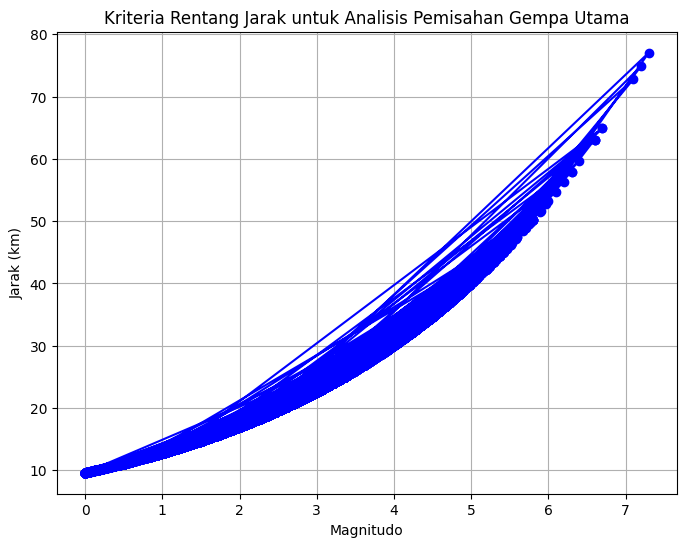

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Fungsi pendekatan Gardner dan Knopoff untuk menghitung jarak
def calculate_distance(magnitude):
    return 10**(0.1238 * magnitude + 0.983)

# Memuat dataset
dataset = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/usgs_california_1968_2018.csv"
data = pd.read_csv(dataset)

# Mengambil kolom magnitudo dari dataset
magnitudes = data['mag']

# Hitung jarak untuk setiap magnitudo menggunakan pendekatan Gardner dan Knopoff
distances = calculate_distance(magnitudes)

# Plotting grafik
plt.figure(figsize=(8, 6))
plt.plot(magnitudes, distances, marker='o', linestyle='-', color='blue')
plt.title('Kriteria Rentang Jarak untuk Analisis Pemisahan Gempa Utama')
plt.xlabel('Magnitudo')
plt.ylabel('Jarak (km)')
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

# Membaca dataset
url = "https://raw.githubusercontent.com/arifadli/DatasetRepository/main/Disertation/California/usgs_california_1968_2018.csv"
data = pd.read_csv(url)

# Mengurutkan data berdasarkan waktu
data['time'] = pd.to_datetime(data['time'])
data = data.sort_values(by='time')

# Fungsi untuk menentukan apakah suatu gempa adalah gempa utama
def is_mainshock(curr_index, delta_time_threshold, delta_distance_threshold):
    current_event = data.iloc[curr_index]
    for i in range(curr_index - 1, -1, -1):  # Iterasi mundur untuk mencari gempa sebelumnya
        previous_event = data.iloc[i]
        delta_time = (current_event['time'] - previous_event['time']).total_seconds()
        delta_distance = ((current_event['latitude'] - previous_event['latitude'])**2 +
                          (current_event['longitude'] - previous_event['longitude'])**2)**0.5
        if delta_time <= delta_time_threshold and delta_distance <= delta_distance_threshold:
            return False  # Jika terdapat gempa sebelumnya dalam threshold, dianggap bukan gempa utama
    return True  # Jika tidak ada gempa sebelumnya dalam threshold, dianggap gempa utama

# Parameter untuk threshold waktu (dalam detik) dan jarak (dalam derajat)
delta_time_threshold = 24 * 60 * 60  # Misalnya, threshold waktu 24 jam
delta_distance_threshold = 1.0  # Misalnya, threshold jarak 1 derajat

# Tentukan label untuk setiap gempa
mainshock_labels = []
for i in range(len(data)):
    mainshock_labels.append(is_mainshock(i, delta_time_threshold, delta_distance_threshold))

# Tambahkan kolom 'Type' yang menandai gempa utama atau aftershock
data['Type'] = mainshock_labels

# Memisahkan gempa utama dari aftershock
mainshocks = data[data['Type'] == True]
aftershocks = data[data['Type'] == False]

# Menampilkan tabel gempa utama
print("Gempa Utama:")
print(mainshocks[['time', 'latitude', 'longitude', 'depth', 'mag']])

# Menampilkan tabel aftershock
print("\nAftershock:")
print(aftershocks[['time', 'latitude', 'longitude', 'depth', 'mag']])
